### 19. k平均法(k-means)

#### <font color = blue>**1.** </font>ライブラリについて

In [ ]:
'''
使用するメソッドの情報

sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001, precompute_distances='auto', verbose=0,
                       random_state=None, copy_x=True, n_jobs=1)

引数 | 説明
-----------:|:------------
n_clusters | クラスタ数(デフォルト値:8) 
max_iter | 繰り返し回数の最大値(デフォルト値:300)
n_init | 初期値選択において、異なる乱数のシードで初期の重心を選ぶ処理の実行回数
 | (デフォルト値:10)
init | 初期化の方法。’k-means++”, ‘random’ もしくは ndarray を指定
 | (デフォルト値: ‘k-means++’)
tol | 収束判定に用いる許容可能誤差(デフォルト値:0.0001)
precompute_distances | 距離(データのばらつき具合) を事前に計算するか。
 | ‘auto’, True, False から指定(デフォルト値:‘auto’)
verbose | 1 を指定すると、詳細な分析結果を表示(デフォルト値:0)
random_state | 乱数のシードを固定する場合に指定
 | 数値もしくは integer or numpy.RandomState で指定(デフォルト値:None)
copy_x | 距離を事前に計算する場合、メモリ内でデータを複製してから実行するかどうか
 | (デフォルト値:True)
n_jobsv | 初期化を並列処理する場合の多重度
 | -1 を指定するとすべての CPU を使用(デフォルト値:1)

クラスメソッド | 説明
-----------:|:------------
fit(X[, y]) | クラスタリングの計算を実行する
fit_predict(X[, y]) | 各サンプルに対する、クラスタ番号を求める
fit_transform(X[, y]) | クラスタリングの計算を行い、X を分析に用いた距離空間に変換して返す
get_params([deep]) | 計算に用いたパラメータを返す
predict(X) | X のサンプルが属しているクラスタ番号を返す
set_params(**params) | パラメータを設定する
transform(X[, y]) | X を分析に用いた距離空間に変換して返す

#### <font color = blue>**2.** </font>ランダム生成したデータでk平均法

##### <font color = green>**2.1.** </font>データ生成

In [1]:
# ライブラリのインポート

import numpy as np
import pandas as pd

In [2]:
# 乱数のseed値を固定

np.random.seed(seed=39)

In [3]:
# 生成するグループの数
k = 8

# グループ内のメンバー数
m = 300

## 全部で 8*300=2400 個のデータを生成

In [4]:
# グループ内のデータの分散を設定

d = m/(k-1)
sigma = [[d, 0], [0, d]]

In [5]:
# データ点(2次元)の生成

# データの受け皿として空の２次元配列の変数を宣言
x = np.empty((0, 2))


for ell in range(k):
  # グループ毎の中心点を決める
  pc = np.random.uniform(low = d*(ell-1)/2, high = d*(ell+1)/2, size = (2,))

  # 中心点の周りに 分散sigma で m個 のデータをランダム生成
  xs = np.random.multivariate_normal(pc, sigma, m)

  # 生成したデータを受け皿の変数に格納（追加）
  x = np.concatenate([x, xs])

In [6]:
# matplotlib.pyplot で可視化してみましょう
# ライブラリのインポート

import matplotlib.pyplot as plt

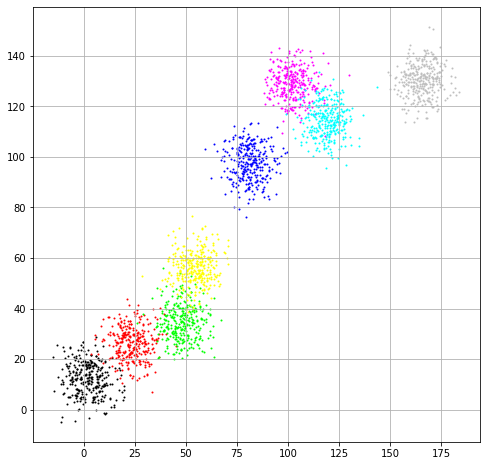

In [16]:
## 散布図にしたいのでplt.scatter()を使います
# 描画する点1つ1つの大きさを設定
plt.rcParams['lines.markersize'] = 1

# グラフのサイズを指定
plt.figure(figsize=(8, 8))

# 2400個の点を、生成時のグループ毎に色分けします
for i in range(x.shape[0]):
  # 色分けのための変数処理
  n = int(1+(k-1)**(1/3))
  r = int(i/m)%(n)/(n-1)
  g = int(int(i/m)/n)%n/(n-1)
  b = int(int(i/m)/(n**2))/(n-1)

  # 白色だと見えないので灰色にします
  if (r,g,b) == (1,1,1):
    (r,g,b) = (3/4,3/4,3/4)

  # 散布図にデータを追加
  plt.scatter(x[i, 0], x[i, 1], color = (r,g,b))

# 見やすいよう縦横の罫線を表示します 
plt.grid(True)

# グラフを出力
plt.show()

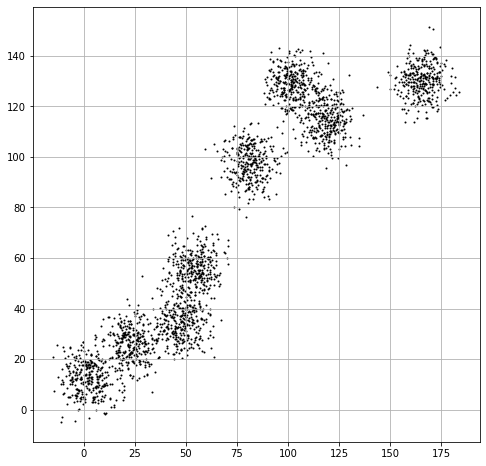

In [17]:
# 2400個全て黒色にした散布図

plt.rcParams['lines.markersize'] = 1
plt.figure(figsize=(8, 8))

for i in range(x.shape[0]):
  plt.scatter(x[i, 0], x[i, 1], color = "k")

plt.grid(True)

plt.show()

##### <font color = green>**2.2.** </font>クラスタリングの実行

In [18]:
# ライブラリのインポート

from sklearn.cluster import KMeans

In [19]:
# 色分けのためのリストを宣言しておく

color = ["red", "blue", "green", "orange", "aqua", "purple", "grey", "black"]

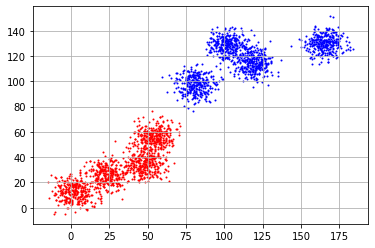

In [165]:
## k-meansを実行
# 2種類のグループ（クラスタ）に分ける（クラスタリングする）場合はこのような記述になる

km2 = KMeans(2)
km2.fit_transform(x)

# 描画する点1つ1つの大きさを設定
plt.rcParams['lines.markersize'] = 1

for i in range(x.shape[0]):
  plt.scatter(x[i,0], x[i,1], c=color[int(km2.labels_[i])])

# 罫線の表示有り  
plt.grid(True)

plt.show()

In [20]:
# 2個〜8個のグループ（クラスター）に分ける、全場合を試したい

km_list = [KMeans(i) for i in range(2,k+1)]

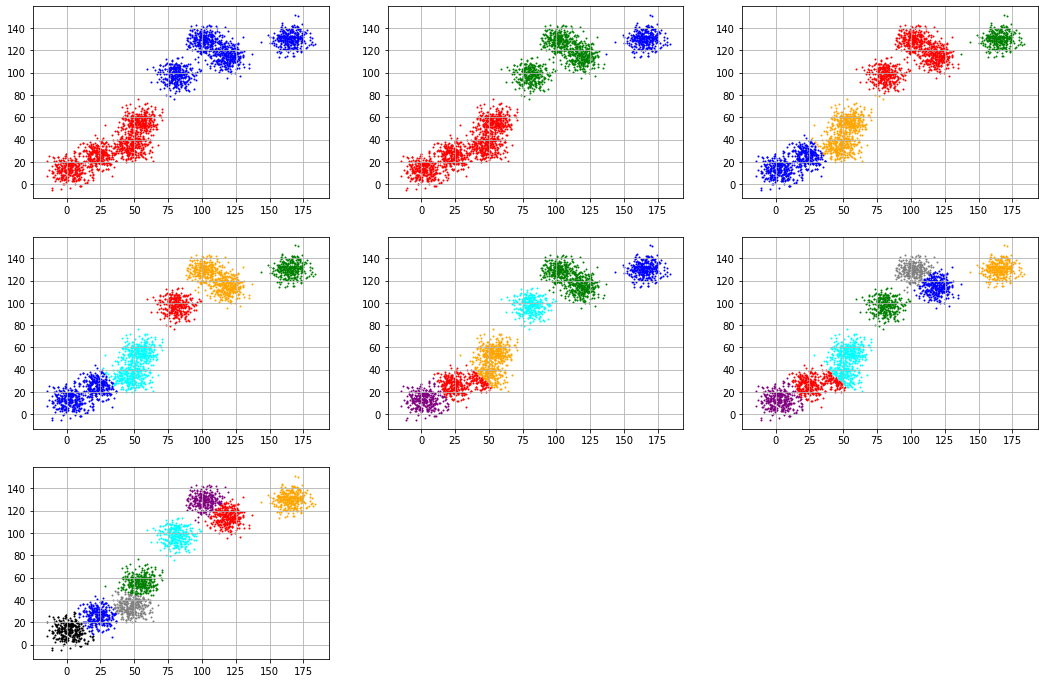

In [21]:
## plt.subplot() で一度にグラフ表示させたい
# グラフ1つ1つの大きさではなく、グラフを描画したい領域全体の大きさを指定
plt.figure(figsize=(18, 12))

# 描画する点1つ1つの大きさを設定
plt.rcParams['lines.markersize'] = 1

# 2個〜8個のグループにクラスタリングした結果を描画していく
for i in range(len(km_list)):
  # KMeans.fit_transform()でクラスタリングを実行
  km_list[i].fit_transform(x)

  # 3*3のsubplotに順番に描画結果を配置していく
  plt.subplot(3,3,i+1)

  for ii in range(x.shape[0]):
    # クラスタリングにより別れたグループ毎に色を変えて散布図に描画
    plt.scatter(x[ii,0], x[ii,1], c=color[int(km_list[i].labels_[ii])])

    # 罫線の表示有り  
    plt.grid(True)


# グラフを出力
plt.show()

##### <font color=red>task : </font> 上記のデータに対し、9個以上のグループに分けるようなクラスタリングを行ってみる

##### <font color = green>**2.3.** </font>クラスター評価

In [ ]:
## エルボー法で評価してみよう
# KMeans.inertia_ でSSE（クラスタ内誤差平方和）が取得できる
# inertia[inə́ːʃə] : 慣性

# クラスター数　2≦k≦20 で評価
# 改めて上記範囲でクラスタリング実行
km_list2 = [KMeans(i) for i in range(2,21)]
for i in range(len(km_list2)):
  km_list2[i].fit_transform(x)

In [ ]:
# SSEを格納するリストを作成
sse_vec = []

# SSEを取得
for i in range(len(km_list2)):
  sse_vec += [km_list2[i].inertia_]

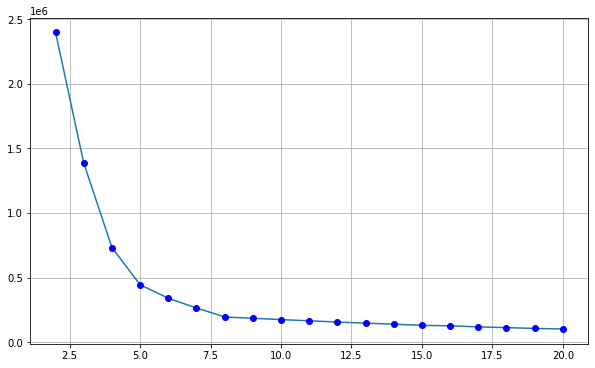

In [31]:
# グラフに描画

# サイズと点の大きさを調整
plt.figure(figsize=(10, 6))
plt.rcParams['lines.markersize'] = 6

# データ点をプロット
plt.plot(range(2, 2+len(km_list2)), sse_vec, "bo")

# データ点を折れ線でつないだ場合も表示
plt.plot(range(2, 2+len(km_list2)), sse_vec)

# 罫線の表示あり
plt.grid(True)

plt.show()

In [ ]:
## k=4 と k=8 でエルボーがある…？

# エルボー法以外にも、クラスタリングの結果の妥当性を評価する手法が提唱されている

##### <font color=red>task : </font> 上記のデータに対し、エルボー法以外の手法、例えば
- シルエット分析
- エントロピー評価

によって妥当なクラスタ数を評価してみましょう

#### <font color = blue>**3.** </font>k平均法の途中経過を知りたい

##### <font color = green>**3.1.** </font>k平均法のコードを自作する

In [ ]:
# ライブラリのインポート

import numpy as np
import matplotlib.pyplot as plt

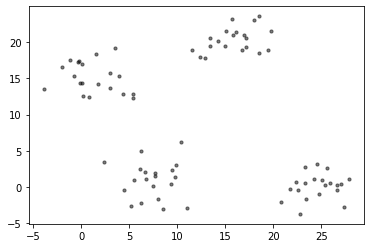

In [58]:
##データの生成（ランダム）

# グループ内のデータ数
n = 20

# グループ内の分散
d = 2

# 乱数のseed値を固定
np.random.seed(123)

x1 = np.r_[np.random.normal(size=n, loc=1, scale=d),
           np.random.normal(size=n, loc=8, scale=d),
           np.random.normal(size=n, loc=15, scale=d),
           np.random.normal(size=n, loc=25, scale=d)]
x2 = np.r_[np.random.normal(size=n, loc=15, scale=d),
           np.random.normal(size=n, loc=1, scale=d),
           np.random.normal(size=n, loc=20, scale=d),
           np.random.normal(size=n, loc=0, scale=d)]
X = np.c_[x1, x2]

#可視化
plt.scatter(X[:,0], X[:,1], c="black", s=10, alpha=0.5)
plt.show()

In [33]:
# k=4 でクラスタリングの場合
# 中心点の初期値を決める

centers = np.array([[0,5],[5,0],[10,15],[20,10]])

In [35]:
# 色分けのリスト
# （ここでは2.2で使用したリストと同じにしている）

color = ["red", "blue", "green", "orange", "aqua", "purple", "grey", "black"]

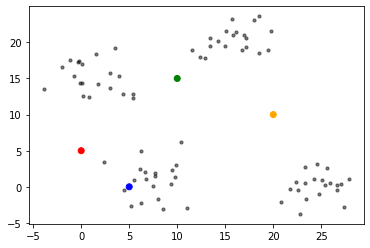

In [34]:
# 初期配置の可視化

plt.scatter(X[:,0], X[:,1], c="black", s=10, alpha=0.5)
plt.scatter(centers[:,0],centers[:,1],color=color[0:4])
plt.show()

In [36]:
# Xのサンプル数だけ空のラベルを作る

idx = np.zeros(X.shape[0])

# 距離の二乗が一番近い中心点のインデックスを返す。

for i in range(X.shape[0]):
  idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))

# np.sum に axis=1 をつけることで、行方向に足し算を行って、np.argmin で一番小さい値となるインデックスを返します

In [37]:
# 計算結果の確認

print(idx)

[2. 2. 2. 0. 0. 2. 0. 0. 2. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 3. 2.
 2. 3. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3.]


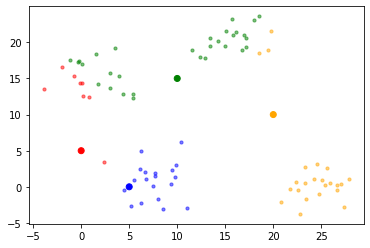

In [38]:
# k-means １回目の結果を色分けして可視化
for i in range(X.shape[0]):
  plt.scatter(X[i,0], X[i,1], c=color[int(idx[i])], s=10, alpha=0.5)

# 中心点はまだ移動させずにそのまま
plt.scatter(centers[:,0],centers[:,1],color=color[0:4])

plt.show()

In [40]:
## それぞれのグループの平均値をとったところを次の中心点の移動先とする
# 例えば、黄色グループの中心座標はここ
# X[idx==3,:].mean(axis=0)

#中心の移動
for k in range(4):
  centers[k,:] = X[idx==k,:].mean(axis=0)

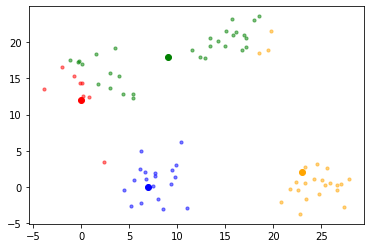

In [41]:
# 中心点を移動させた状態、即ち、
# k-means 2回目の実行前の状態を可視化

for i in range(X.shape[0]):
  plt.scatter(X[i,0], X[i,1], c=color[int(idx[i])], s=10, alpha=0.5)
for i in range(len(centers)):
  plt.scatter(centers[i][0], centers[i][1], c=color[i])

plt.show()

In [ ]:
#####################################
# 以上の処理内容を、0回（初期状態）〜8回実行して  #
# 結果全てを順番にグラフ描画すると以下のようになる #
#####################################

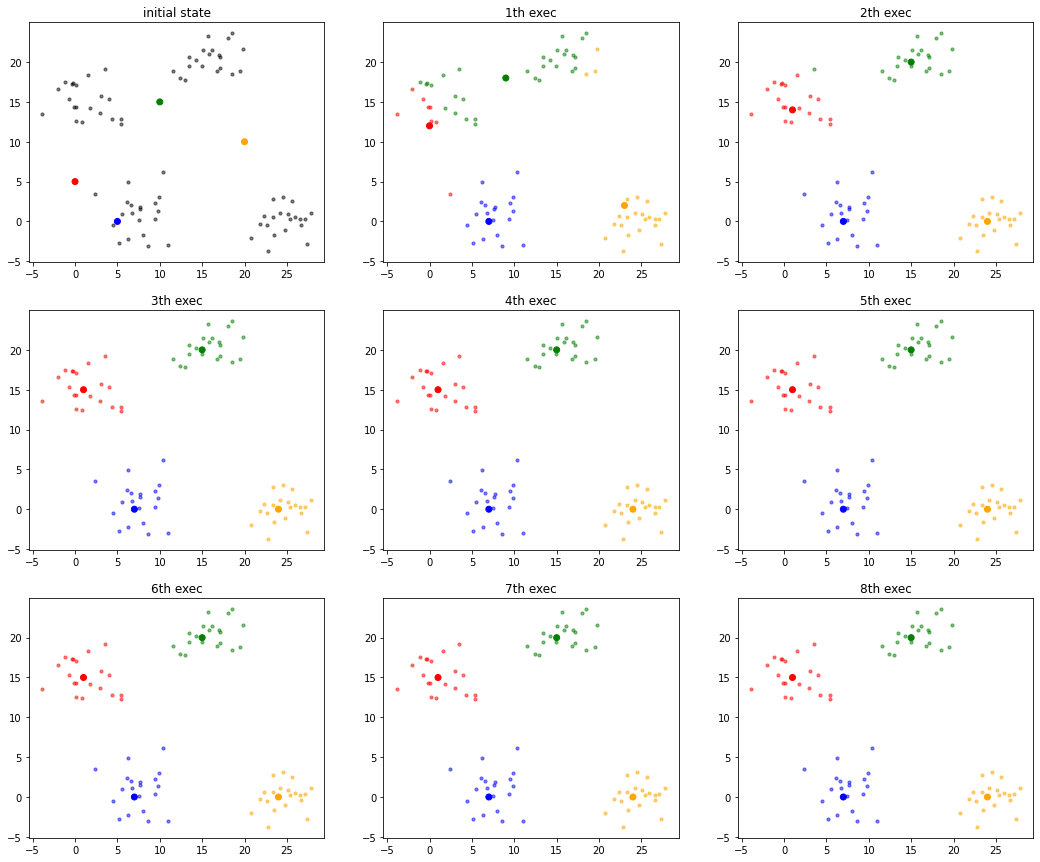

In [42]:
idx = np.zeros(X.shape[0])
centers = np.array([[0,5],[5,0],[10,15],[20,10]])

plt.figure(figsize=(18, 15))
plt.subplot(3, 3, 1)

plt.scatter(X[:,0], X[:,1], c="black", s=10, alpha=0.5)
plt.title("initial state")
plt.scatter(centers[:,0],centers[:,1],color=color[0:4])

for j in np.arange(1,9):
  for i in range(X.shape[0]):
    idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))
        
  for k in range(len(centers)):
    centers[k,:] = X[idx==k,:].mean(axis=0)
        
  plt.subplot(3, 3, j+1)
  for l in range(len(centers)):
    plt.scatter(X[idx==l,0],X[idx==l,1],color=color[l],s=10,alpha=0.5)

  plt.title("{}th exec".format(j))
  plt.scatter(centers[:,0],centers[:,1],color=color[0:4])

plt.show()

##### <font color=red>task : </font> 上記の自作したプログラムについて、クラスタリング対象データ(X)のみを与えれば良いように改良する。
即ち、最初の中心点を自動的に決定する処理を加える。

k-means++ 法では、互いの距離が遠いほど確率的に選ばれやすくなっている。\
しかしあくまで確率なので、初期値選びに失敗することは大いにあり得る。

sklearn.cluster.KMeans では、中心の初期値選びに失敗することを考慮して、n_init引数により指定した回数だけk-meansを実行し、SSEが一番小さくなる初期値での結果が採用されるようになっている。


In [46]:
## SSEの計算を含め関数化するとこんな感じ

def kmeans(X,K,centers,iter):
  # Xのサンプル数だけ空のラベルを作る
  idx = np.zeros(X.shape[0])

  # グループごとのSSEを格納するための入れ物
  sse = np.zeros(K)

  for _ in range(iter):
    # 距離の二乗が一番近い中心点のインデックスを返す
    for i in range(X.shape[0]):
      idx[i] = np.argmin(np.sum((X[i,:] - centers)**2,axis=1))
       
    for k in range(K):
      # 中心の移動
      centers[k,:] = X[idx==k,:].mean(axis=0)
      # SSEの計算
      sse[k] = np.sum((X[idx==k,:]-centers[k,:])**2)

  # 全てのグループのSSEを合計する
  sse_sum = np.sum(sse)

  return idx,sse_sum

In [96]:
## 中心点の初期条件に配慮して、 k-means++法にした場合
#
# 最初の中心点を、距離が遠いほど確率的に選ばれやすくしているが、
# あくまで確率なので初期値選びに失敗することは大いにある
#
# sklearn.cluster.KMeans では、中心の初期値選びに失敗することを考慮して、
# n_init引数により指定した回数だけk-meansを実行し、SSEが一番小さくなる初期値での結果が採用される
#

def kmeansplus(X,K,iter):
  # 距離の２乗を保存する サンプル数　×　グループ数 の行列をつくる
  n = X.shape[0]
  distance = np.zeros(n*K).reshape(n,K)

  # 中心点の座標を保存するための入れ物
  centers = np.zeros(X.shape[1]*K).reshape(K,-1)

  # 最初の確率は均等
  pr = np.repeat(1/n,n)
  # 1つ目の中心点はランダムに選ぶ
  centers[0,:] = X[np.random.choice(np.arange(n),1,p=pr),]
  distance[:,0] = np.sum((X-centers[0,:])**2,axis=1)
  
  for k in np.arange(1,K):
    # 1つ目の中心点からの距離によって確率を変更
    pr = np.sum(distance,axis=1)/np.sum(distance)

    # 確率に従って2つ目の点を選ぶ
    centers[k,:] = X[np.random.choice(np.arange(n),1,p=pr),]
    distance[:,k] = np.sum((X-centers[k,:])**2,axis=1)
    
  idx,sse = kmeans(X,K,centers,iter)
    
  return idx,sse

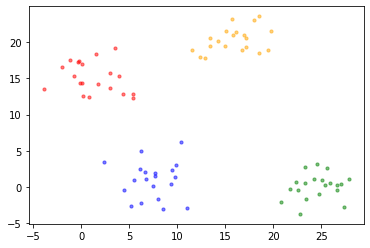

In [101]:
K = 4

idx,sse = kmeansplus(X,K,30)

for i in range(K):
  plt.scatter(x1[idx==i], x2[idx==i], color=color[i], s=10, alpha=0.5)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


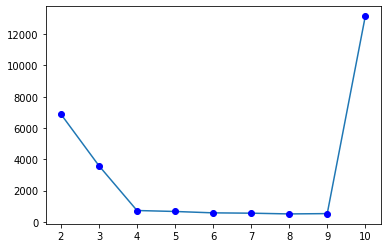

In [100]:
# クラスの数を2から10まで変化させた時にSSEがどのようになるかエルボー法

K = 10
sse_vec = np.zeros(K-1)
for k in range(K-1):
  idx , sse = kmeansplus(X, k+2, 10)
  sse_vec[k] = sse

plt.plot(np.arange(2, K+1), sse_vec)
plt.plot(np.arange(2, K+1), sse_vec, "bo")
plt.show()

### 20. 主成分分析(PCA)

#### <font color = blue>**1.** </font>Mall_Customersのデータより

In [ ]:
# 加工したデータ: https://raw.githubusercontent.com/jiai-edu/teaching_ep_elementary-phython/master/datasets/PCA_demoData.csv

In [103]:
# numpy を import

import numpy as np

In [104]:
# numpy配列（ndarray形式）として読み込む
# numpy.loadtxt() で .txt も .csv も読み込める
# カンマ区切りで配列要素に格納してほしいので、引数に delimiter="," と指定する

data = np.loadtxt('https://raw.githubusercontent.com/jiai-edu/teaching_ep_elementary-phython/master/datasets/PCA_demoData.csv', delimiter=",") 

In [105]:
# ndarray.shape で配列の構造を確認

data.shape

(200, 5)

In [106]:
# 比較のため元データも読み込んでみる
# pandas を import

import pandas as pd

In [107]:
# pandas.DataFrame 形式で元データを読み込む
# 16. 相関分析 で扱った元データの保存場所: https://raw.githubusercontent.com/jiai-tus/FirstTerm/main/20201201/dataset/Mall_Customers.csv

df = pd.read_csv("https://raw.githubusercontent.com/jiai-tus/FirstTerm/main/20201201/dataset/Mall_Customers.csv")

In [108]:
# 先頭１０行を表示

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [109]:
# 加工したデータも同じく先頭１０行を確認
# pandas.DataFrame ではないので、 head() メソッドなどは存在しない。はず。。

for i in range(10):
  print(data[i])

[ 1.  1. 19. 15. 39.]
[ 2.  1. 21. 15. 81.]
[ 3.  0. 20. 16.  6.]
[ 4.  0. 23. 16. 77.]
[ 5.  0. 31. 17. 40.]
[ 6.  0. 22. 17. 76.]
[ 7.  0. 35. 18.  6.]
[ 8.  0. 23. 18. 94.]
[ 9.  1. 64. 19.  3.]
[10.  0. 30. 19. 72.]


In [110]:
# 標準化や規格化なしでとりあえず主成分分析(PCA)してみる
# ライブラリのインポート

from sklearn.decomposition import PCA

In [111]:
# 2次元に削減（上位2変数を取り出す）場合はこのように記述

pca = PCA(n_components=2)
data_2D = pca.fit_transform(data)

In [112]:
# 配列構造を確認

data_2D.shape

(200, 2)

In [113]:
# 先頭１０行を確認

for i in range(10):
  print(data_2D[i])

[-109.38394055    5.47845404]
[-108.202857    -34.93176488]
[-107.37629206   37.84087172]
[-106.00780674  -30.56269646]
[-104.98032255    7.29674715]
[-103.77472296  -29.80123813]
[-102.99648078   41.32276991]
[-101.42674453  -47.07130349]
[-100.95219122   50.92373825]
[-99.38052226 -24.03460769]


In [114]:
# 5次元（5変数）のデータなので、1〜5次元の5通りのPCA結果が考えられる
# 5通り全て試してみる

XD = [0] * 5
for i in range(5):
  pca = PCA(n_components=(i+1))
  XD[i] = pca.fit_transform(data)
  print("XD[{}]: ".format(i), XD[i].shape)

XD[0]:  (200, 1)
XD[1]:  (200, 2)
XD[2]:  (200, 3)
XD[3]:  (200, 4)
XD[4]:  (200, 5)


In [115]:
# それぞれ先頭５行を確認してみる

for i in range(5):
  for k in range(5):
    print("XD[{}][{}]: ".format(i, k), XD[i][k])
    
    # 見やすくするため、データ間に改行を挟む
    if i != 4 and k == 4:
      print("\n")

XD[0][0]:  [-109.38394055]
XD[0][1]:  [-108.202857]
XD[0][2]:  [-107.37629206]
XD[0][3]:  [-106.00780674]
XD[0][4]:  [-104.98032255]


XD[1][0]:  [-109.38394055    5.47845404]
XD[1][1]:  [-108.202857    -34.93176488]
XD[1][2]:  [-107.37629206   37.84087172]
XD[1][3]:  [-106.00780674  -30.56269646]
XD[1][4]:  [-104.98032255    7.29674715]


XD[2][0]:  [-109.38394055    5.47845404  -22.36804518]
XD[2][1]:  [-108.202857    -34.93176488  -10.77794564]
XD[2][2]:  [-107.37629206   37.84087172  -28.96855639]
XD[2][3]:  [-106.00780674  -30.56269646   -9.74100115]
XD[2][4]:  [-104.98032255    7.29674715  -10.44185064]


XD[3][0]:  [-109.38394055    5.47845404  -22.36804518   -0.38280387]
XD[3][1]:  [-108.202857    -34.93176488  -10.77794564   -0.91935923]
XD[3][2]:  [-107.37629206   37.84087172  -28.96855639   -0.2588597 ]
XD[3][3]:  [-106.00780674  -30.56269646   -9.74100115   -0.87319024]
XD[3][4]:  [-104.98032255    7.29674715  -10.44185064   -0.53615133]


XD[4][0]:  [-109.38394055    5.478

In [116]:
# matplotlib.pyplot で可視化してみましょう
# ライブラリのインポート

import matplotlib.pyplot as plt

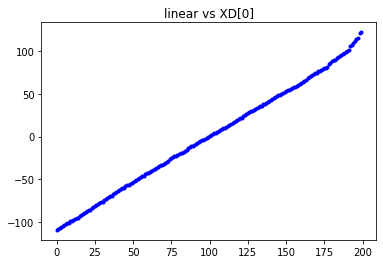

In [117]:
# 1次元にした場合

plt.plot(range(XD[0].shape[0]), XD[0], 'b.')
plt.title("linear vs XD[0]")
plt.show()

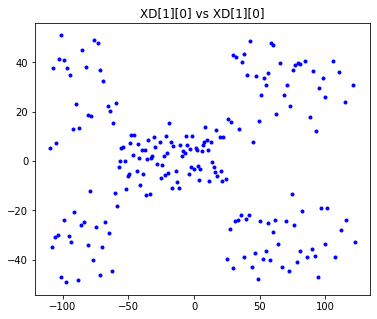

In [118]:
# 2次元にした場合

plt.figure(figsize=(6, 5))
plt.plot(XD[1][:, 0], XD[1][:, 1], 'b.')
plt.title("XD[1][0] vs XD[1][0]")
plt.show()

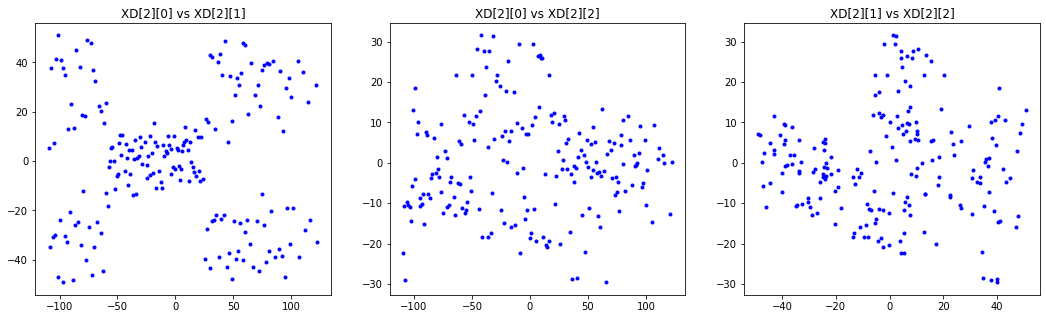

In [119]:
# 3次元にした場合

plt.figure(figsize=(18, 5))

n = 1
for i in range(3):
  for k in range(i+1, 3):
    plt.subplot(1,3,n)
    plt.plot(XD[2][:, i], XD[2][:, k], 'b.')
    plt.title("XD[2][{}] vs XD[2][{}]".format(i, k))
    n += 1

#plt.subplots_adjust(hspace=0.25)
plt.show()

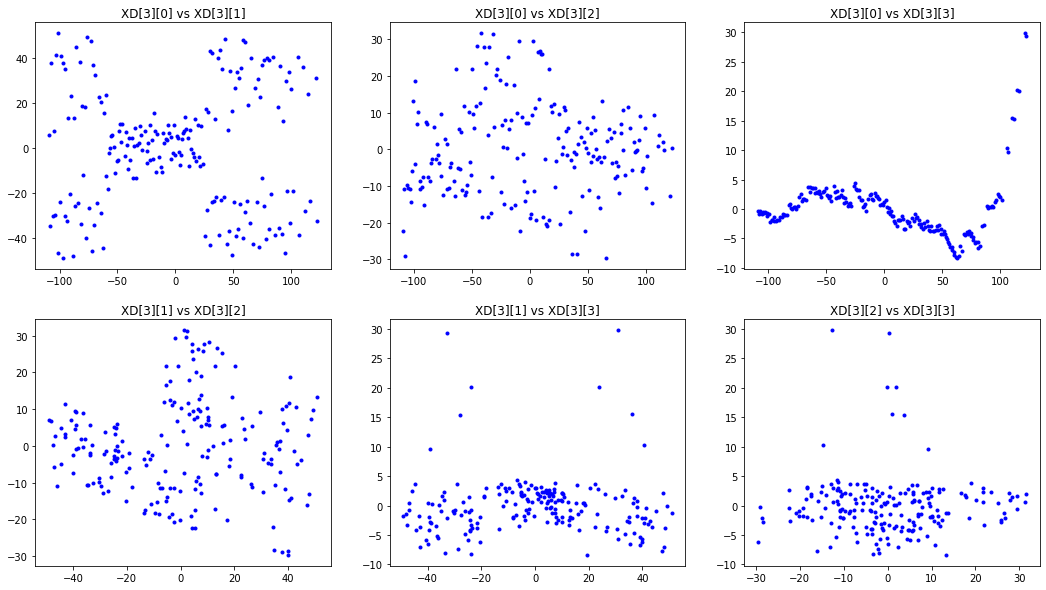

In [120]:
# 4次元にした場合

plt.figure(figsize=(18, 10))

n = 1
for i in range(4):
  for k in range(i+1, 4):
    plt.subplot(2,3,n)
    plt.plot(XD[3][:, i], XD[3][:, k], 'b.')
    plt.title("XD[3][{}] vs XD[3][{}]".format(i, k))
    n += 1

#plt.subplots_adjust(hspace=0.25)
plt.show()

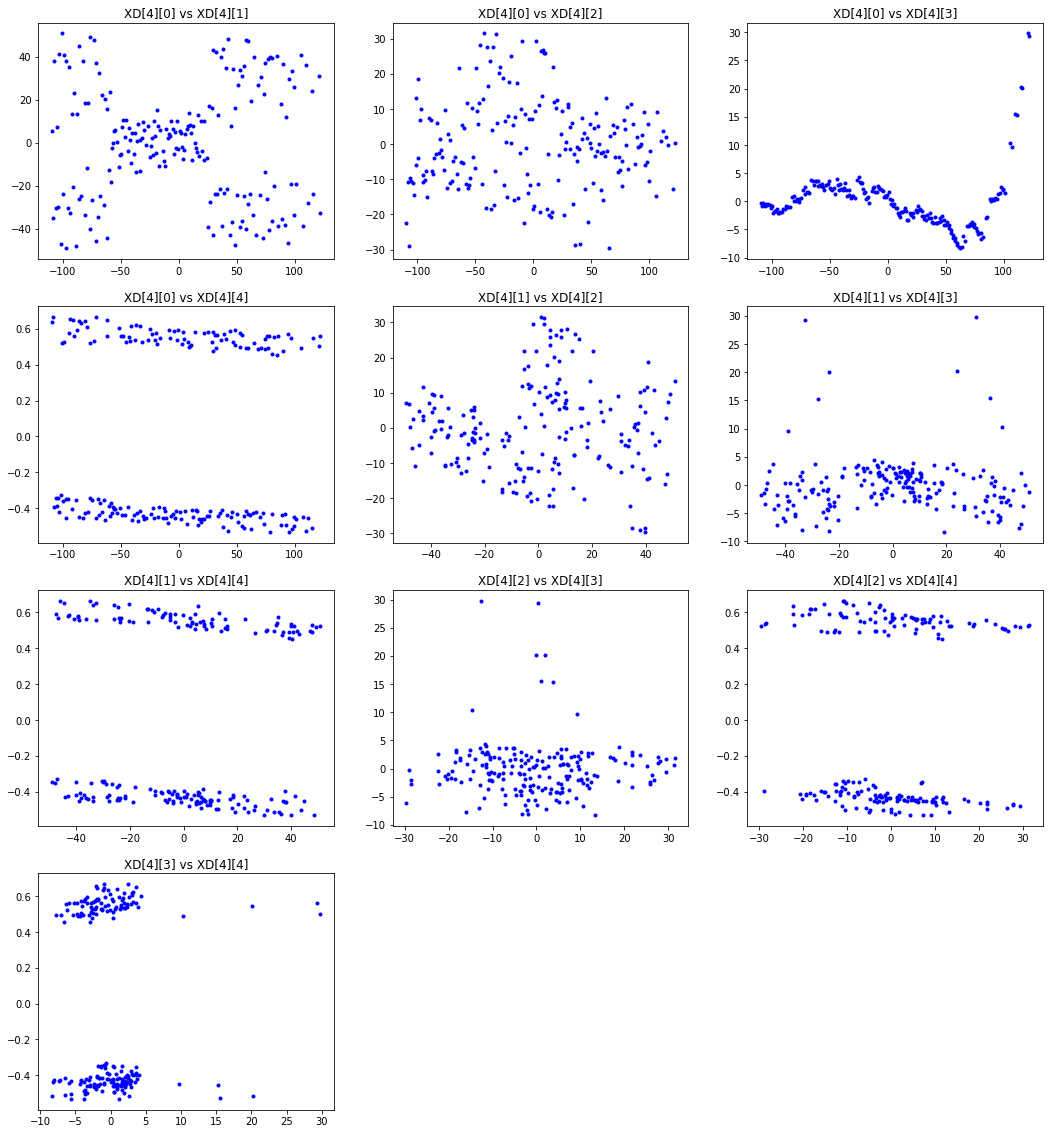

In [122]:
# 5次元にした場合

plt.figure(figsize=(18, 20))

n = 1
for i in range(5):
  for k in range(i+1, 5):
    plt.subplot(4,3,n)
    plt.plot(XD[4][:, i], XD[4][:, k], 'b.')
    plt.title("XD[4][{}] vs XD[4][{}]".format(i, k))
    n += 1

#plt.subplots_adjust(hspace=0.25)
plt.show()

#### <font color=red>task : </font> データの前処理を行ってから主成分分析を実行する
5つの変数それぞれで標準化/規格化の有無を全て試すのも1つの手だが、元々のデータの意味・人間的解釈から、変数ごとにどういう前処理をすべきか、すべきでないか考察したうえで、実際に行ってみて比較してほしい

In [124]:
# data[:][0]はもともと"CustomerID"なので意味がないどころか余計な変数のはずなので削除

data2 = np.delete(data, [0], 1)

for i in range(10):
  print(data2[i])

[ 1. 19. 15. 39.]
[ 1. 21. 15. 81.]
[ 0. 20. 16.  6.]
[ 0. 23. 16. 77.]
[ 0. 31. 17. 40.]
[ 0. 22. 17. 76.]
[ 0. 35. 18.  6.]
[ 0. 23. 18. 94.]
[ 1. 64. 19.  3.]
[ 0. 30. 19. 72.]


In [125]:
## 標準化せずにPCA

data2_XD = [0] * 4
for i in range(4):
  pca = PCA(n_components=(i+1))
  data2_XD[i] = pca.fit_transform(data2)
  print("XD[{}]: ".format(i), data2_XD[i].shape)

XD[0]:  (200, 1)
XD[1]:  (200, 2)
XD[2]:  (200, 3)
XD[3]:  (200, 4)


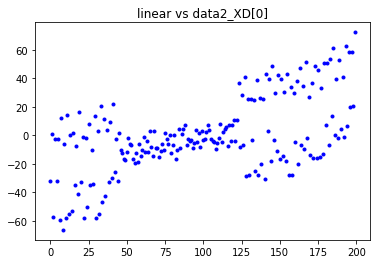

In [126]:
plt.plot(range(data2_XD[0].shape[0]), data2_XD[0], 'b.')
plt.title("linear vs data2_XD[0]")
plt.show()

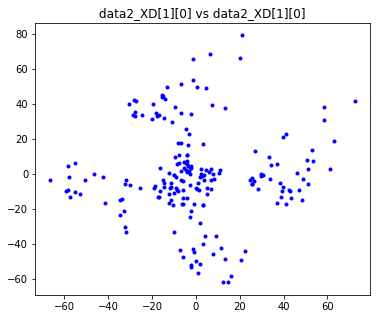

In [127]:
plt.figure(figsize=(6, 5))
plt.plot(data2_XD[1][:, 0], data2_XD[1][:, 1], 'b.')
plt.title("data2_XD[1][0] vs data2_XD[1][0]")
plt.show()

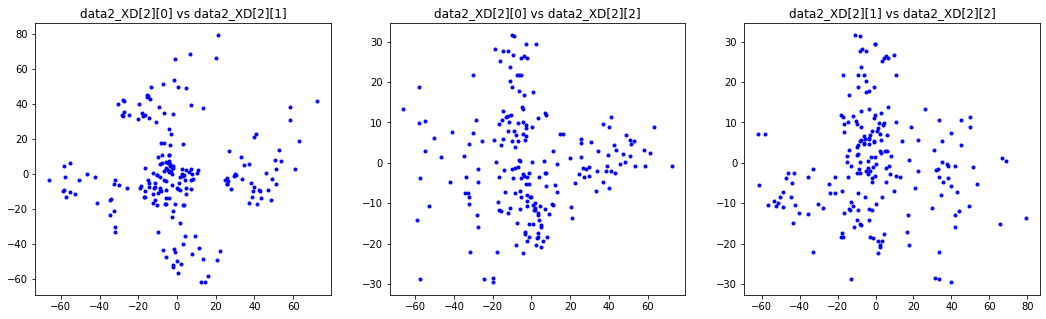

In [128]:
plt.figure(figsize=(18, 5))

n = 1
for i in range(3):
  for k in range(i+1, 3):
    plt.subplot(1,3,n)
    plt.plot(data2_XD[2][:, i], data2_XD[2][:, k], 'b.')
    plt.title("data2_XD[2][{}] vs data2_XD[2][{}]".format(i, k))
    n += 1

plt.show()

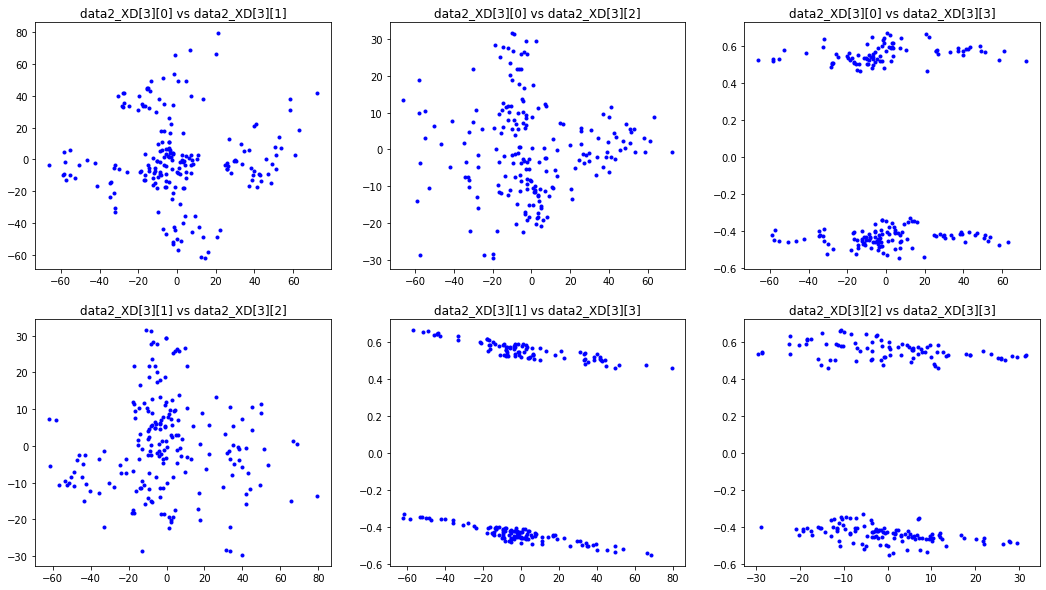

In [129]:
plt.figure(figsize=(18, 10))

n = 1
for i in range(4):
  for k in range(i+1, 4):
    plt.subplot(2,3,n)
    plt.plot(data2_XD[3][:, i], data2_XD[3][:, k], 'b.')
    plt.title("data2_XD[3][{}] vs data2_XD[3][{}]".format(i, k))
    n += 1

plt.show()

In [131]:
# 標準化処理を加える

from sklearn import preprocessing

In [132]:
mm = preprocessing.MinMaxScaler()

In [136]:
## data[:][1]は Male=1/Female=0 と勝手に数値化しただけなので、これ以上手を加えないことにする
# Age, Annual Income (k$), Spending Score (1-100) について規格化（最小０/最大１）

data3 = np.delete(data2, [0], 1)

for i in range(10):
  print(data3[i])

[19. 15. 39.]
[21. 15. 81.]
[20. 16.  6.]
[23. 16. 77.]
[31. 17. 40.]
[22. 17. 76.]
[35. 18.  6.]
[23. 18. 94.]
[64. 19.  3.]
[30. 19. 72.]


In [137]:
data4 = mm.fit_transform(data3)

for i in range(10):
  print(data4[i])

[0.01923077 0.         0.3877551 ]
[0.05769231 0.         0.81632653]
[0.03846154 0.00819672 0.05102041]
[0.09615385 0.00819672 0.7755102 ]
[0.25       0.01639344 0.39795918]
[0.07692308 0.01639344 0.76530612]
[0.32692308 0.02459016 0.05102041]
[0.09615385 0.02459016 0.94897959]
[0.88461538 0.03278689 0.02040816]
[0.23076923 0.03278689 0.7244898 ]


In [141]:
data5 = np.delete(data2, [1, 2, 3], 1)

for i in range(10):
  print(data5[i])

[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[0.]


In [144]:
data6 = np.concatenate([data5, data4], 1)

for i in range(10):
  print(data6[i])

[1.         0.01923077 0.         0.3877551 ]
[1.         0.05769231 0.         0.81632653]
[0.         0.03846154 0.00819672 0.05102041]
[0.         0.09615385 0.00819672 0.7755102 ]
[0.         0.25       0.01639344 0.39795918]
[0.         0.07692308 0.01639344 0.76530612]
[0.         0.32692308 0.02459016 0.05102041]
[0.         0.09615385 0.02459016 0.94897959]
[1.         0.88461538 0.03278689 0.02040816]
[0.         0.23076923 0.03278689 0.7244898 ]


In [145]:
data6_XD = [0] * 4
for i in range(4):
  pca = PCA(n_components=(i+1))
  data6_XD[i] = pca.fit_transform(data6)
  print("XD[{}]: ".format(i), data6_XD[i].shape)

XD[0]:  (200, 1)
XD[1]:  (200, 2)
XD[2]:  (200, 3)
XD[3]:  (200, 4)


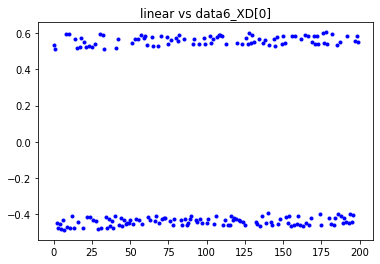

In [146]:
plt.plot(range(data6_XD[0].shape[0]), data6_XD[0], 'b.')
plt.title("linear vs data6_XD[0]")
plt.show()

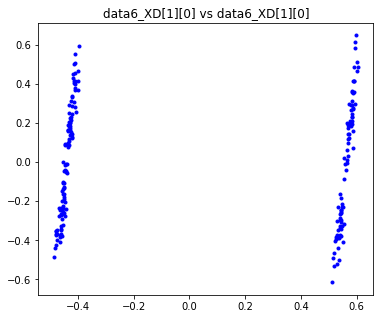

In [147]:
plt.figure(figsize=(6, 5))
plt.plot(data6_XD[1][:, 0], data6_XD[1][:, 1], 'b.')
plt.title("data6_XD[1][0] vs data6_XD[1][0]")
plt.show()

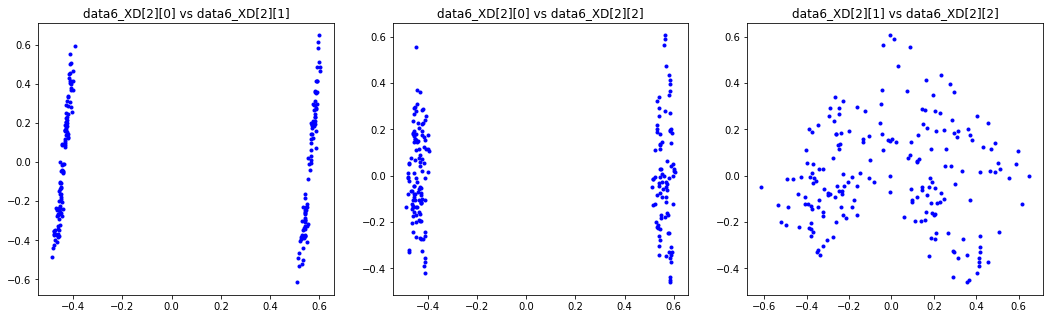

In [148]:
plt.figure(figsize=(18, 5))

n = 1
for i in range(3):
  for k in range(i+1, 3):
    plt.subplot(1,3,n)
    plt.plot(data6_XD[2][:, i], data6_XD[2][:, k], 'b.')
    plt.title("data6_XD[2][{}] vs data6_XD[2][{}]".format(i, k))
    n += 1

plt.show()

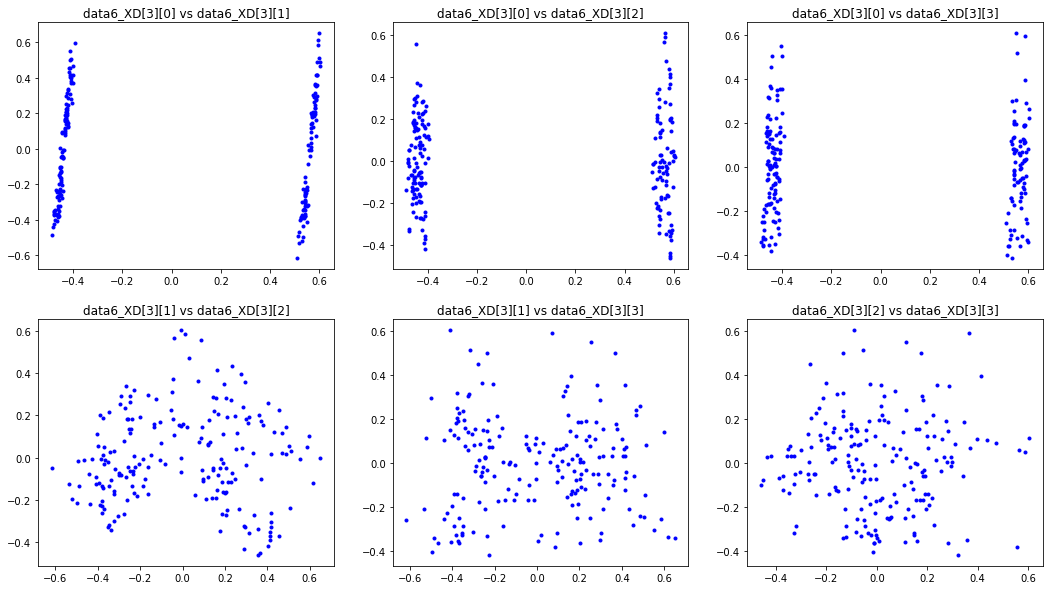

In [149]:
plt.figure(figsize=(18, 10))

n = 1
for i in range(4):
  for k in range(i+1, 4):
    plt.subplot(2,3,n)
    plt.plot(data6_XD[3][:, i], data6_XD[3][:, k], 'b.')
    plt.title("data6_XD[3][{}] vs data6_XD[3][{}]".format(i, k))
    n += 1

plt.show()

In [150]:
# Age, Annual Income (k$), Spending Score (1-100) について標準化（平均0、分散1）

ss = preprocessing.StandardScaler()

In [151]:
data7 = ss.fit_transform(data3)

data8 = np.concatenate([data5, data7], 1)

for i in range(10):
  print(data8[i])

[ 1.         -1.42456879 -1.73899919 -0.43480148]
[ 1.         -1.28103541 -1.73899919  1.19570407]
[ 0.         -1.3528021  -1.70082976 -1.71591298]
[ 0.         -1.13750203 -1.70082976  1.04041783]
[ 0.         -0.56336851 -1.66266033 -0.39597992]
[ 0.         -1.20926872 -1.66266033  1.00159627]
[ 0.         -0.27630176 -1.62449091 -1.71591298]
[ 0.         -1.13750203 -1.62449091  1.70038436]
[ 1.          1.80493225 -1.58632148 -1.83237767]
[ 0.         -0.6351352  -1.58632148  0.84631002]


In [152]:
data8_XD = [0] * 4
for i in range(4):
  pca = PCA(n_components=(i+1))
  data8_XD[i] = pca.fit_transform(data8)
  print("XD[{}]: ".format(i), data8_XD[i].shape)

XD[0]:  (200, 1)
XD[1]:  (200, 2)
XD[2]:  (200, 3)
XD[3]:  (200, 4)


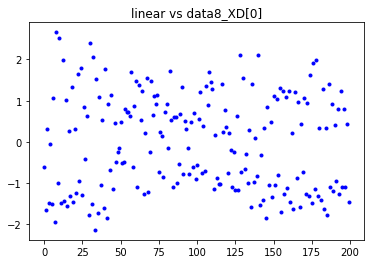

In [153]:
plt.plot(range(data8_XD[0].shape[0]), data8_XD[0], 'b.')
plt.title("linear vs data8_XD[0]")
plt.show()

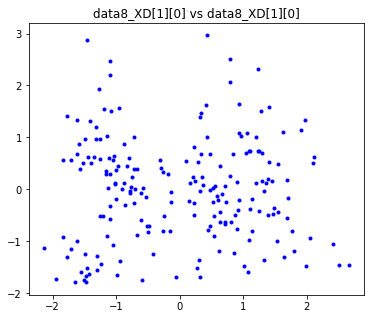

In [154]:
plt.figure(figsize=(6, 5))
plt.plot(data8_XD[1][:, 0], data8_XD[1][:, 1], 'b.')
plt.title("data8_XD[1][0] vs data8_XD[1][0]")
plt.show()

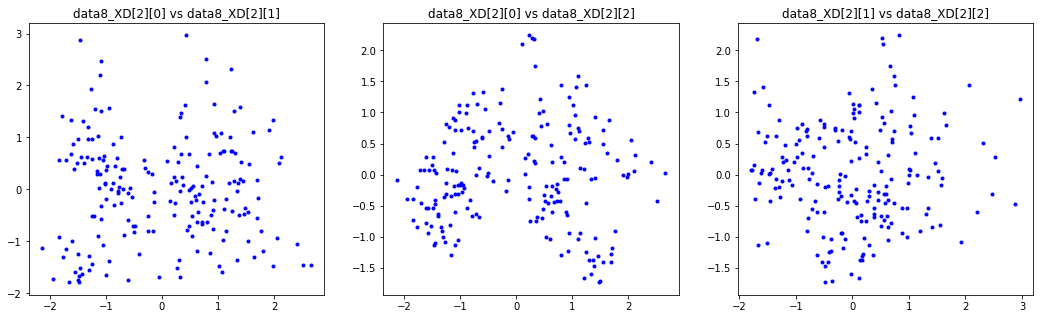

In [155]:
plt.figure(figsize=(18, 5))

n = 1
for i in range(3):
  for k in range(i+1, 3):
    plt.subplot(1,3,n)
    plt.plot(data8_XD[2][:, i], data8_XD[2][:, k], 'b.')
    plt.title("data8_XD[2][{}] vs data8_XD[2][{}]".format(i, k))
    n += 1

plt.show()

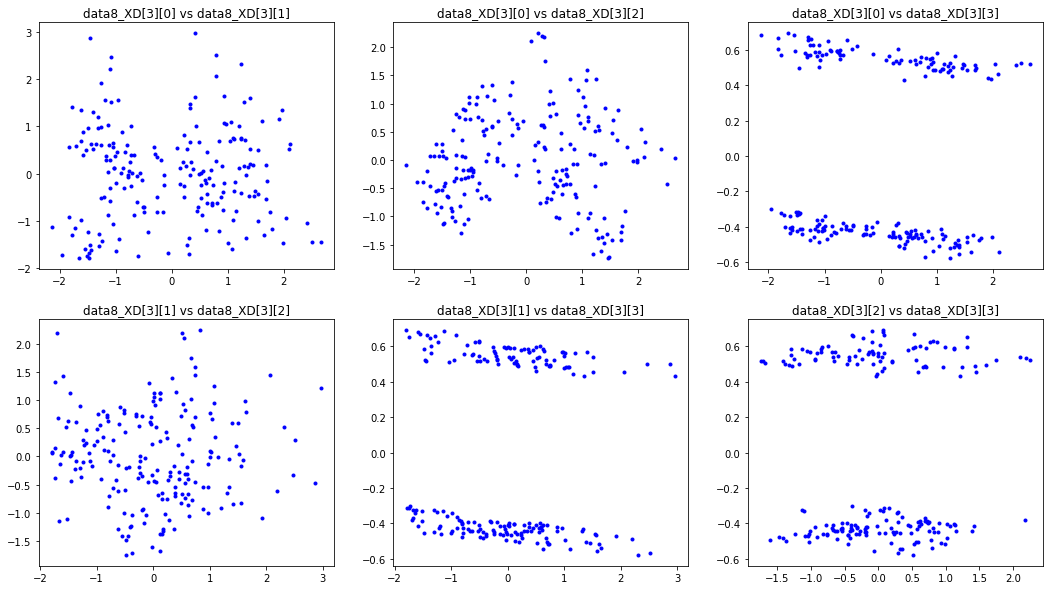

In [156]:
plt.figure(figsize=(18, 10))

n = 1
for i in range(4):
  for k in range(i+1, 4):
    plt.subplot(2,3,n)
    plt.plot(data8_XD[3][:, i], data8_XD[3][:, k], 'b.')
    plt.title("data8_XD[3][{}] vs data8_XD[3][{}]".format(i, k))
    n += 1

plt.show()

In [157]:
# 標準化（平均0、分散1）した Age, Annual Income (k$), Spending Score (1-100) でPCA

data7_XD = [0] * 3
for i in range(3):
  pca = PCA(n_components=(i+1))
  data7_XD[i] = pca.fit_transform(data7)
  print("XD[{}]: ".format(i), data7_XD[i].shape)

XD[0]:  (200, 1)
XD[1]:  (200, 2)
XD[2]:  (200, 3)


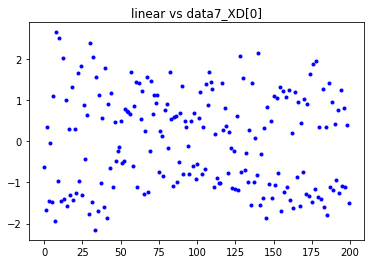

In [158]:
plt.plot(range(data7_XD[0].shape[0]), data7_XD[0], 'b.')
plt.title("linear vs data7_XD[0]")
plt.show()

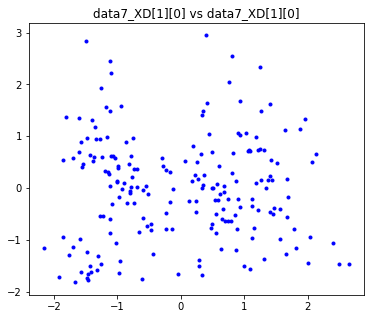

In [159]:
plt.figure(figsize=(6, 5))
plt.plot(data7_XD[1][:, 0], data7_XD[1][:, 1], 'b.')
plt.title("data7_XD[1][0] vs data7_XD[1][0]")
plt.show()

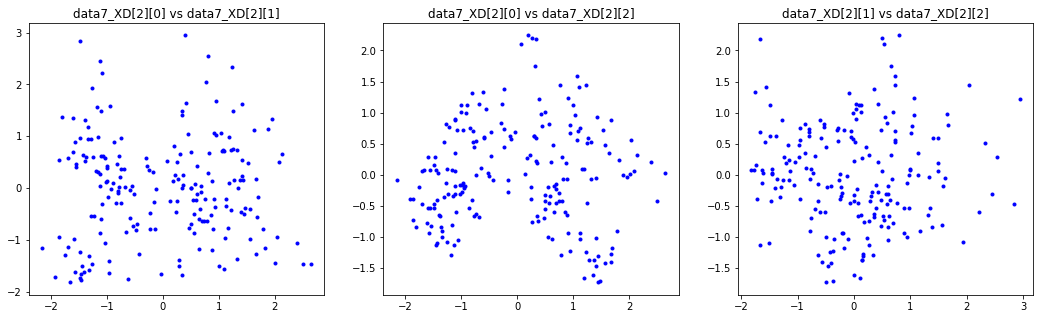

In [160]:
plt.figure(figsize=(18, 5))

n = 1
for i in range(3):
  for k in range(i+1, 3):
    plt.subplot(1,3,n)
    plt.plot(data7_XD[2][:, i], data7_XD[2][:, k], 'b.')
    plt.title("data7_XD[2][{}] vs data7_XD[2][{}]".format(i, k))
    n += 1

plt.show()

#### <font color=red>task : </font> 他のデータセットでも同様の主成分分析を行う。例えば以下
- sklearn.datasets.load_iris()
- sklearn.datasets.load_boston()
- sklearn.datasets.load_wine()

#### <font color=red>task : </font>Mall_Customersのデータに対し主成分分析を行った結果をクラスタリングする
- エルボー法によりクラスター評価まで行うこと
- 前処理の有無も比較するとなおよい


In [161]:
# ライブラリのインポート

from sklearn.cluster import KMeans

In [162]:
# 色分けのリストを決めておく

color = ["red", "blue", "green", "orange", "aqua", "purple", "grey", "black"]

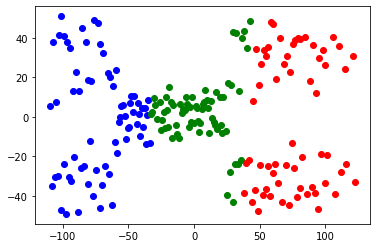

In [ ]:
# 3種類のグループ（クラスタ）に分ける（クラスタリングする）場合はこのような記述

km3 = KMeans(3)

km3.fit_transform(XD[1])

for i in range(XD[1].shape[0]):
  plt.scatter(XD[1][i,0], XD[1][i,1], c=color[int(km3.labels_[i])])

plt.show()

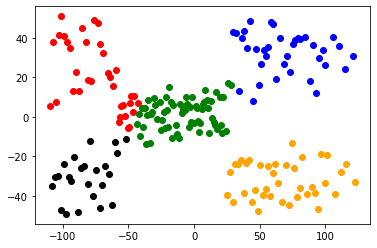

In [ ]:
# 5種類のグループ（クラスタ）に分ける（クラスタリングする）場合はこのような記述

km5 = KMeans(5)

km5.fit_transform(XD[1])

for i in range(XD[1].shape[0]):
  plt.scatter(XD[1][i,0], XD[1][i,1], c=color[int(km5.labels_[i])])

plt.show()